In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\ASUS\Downloads\nifty50_closing_prices.csv")

print(data.head())

                        Date  RELIANCE.NS  HDFCBANK.NS  ICICIBANK.NS  \
0  2024-08-20 00:00:00+05:30  2991.899902  1637.699951   1179.449951   
1  2024-08-21 00:00:00+05:30  2997.350098  1625.800049   1174.849976   
2  2024-08-22 00:00:00+05:30  2996.250000  1631.300049   1191.099976   
3  2024-08-23 00:00:00+05:30  2999.949951  1625.050049   1203.500000   
4  2024-08-26 00:00:00+05:30  3025.199951  1639.949951   1213.300049   

       INFY.NS       TCS.NS  KOTAKBANK.NS  HINDUNILVR.NS      ITC.NS  \
0  1872.199951  4523.299805   1805.650024    2751.050049  498.799988   
1  1872.699951  4551.500000   1812.949951    2791.199951  505.399994   
2  1880.250000  4502.000000   1821.500000    2792.800049  504.549988   
3  1862.099976  4463.899902   1818.000000    2815.600098  505.799988   
4  1876.150024  4502.450195   1812.500000    2821.149902  505.700012   

         LT.NS  ...  HEROMOTOCO.NS   DRREDDY.NS   SHREECEM.NS  BRITANNIA.NS  \
0  3572.699951  ...    5244.399902  6965.350098  24730.

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.isnull().sum())

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


In [5]:
data.fillna(method='ffill',inplace =True)

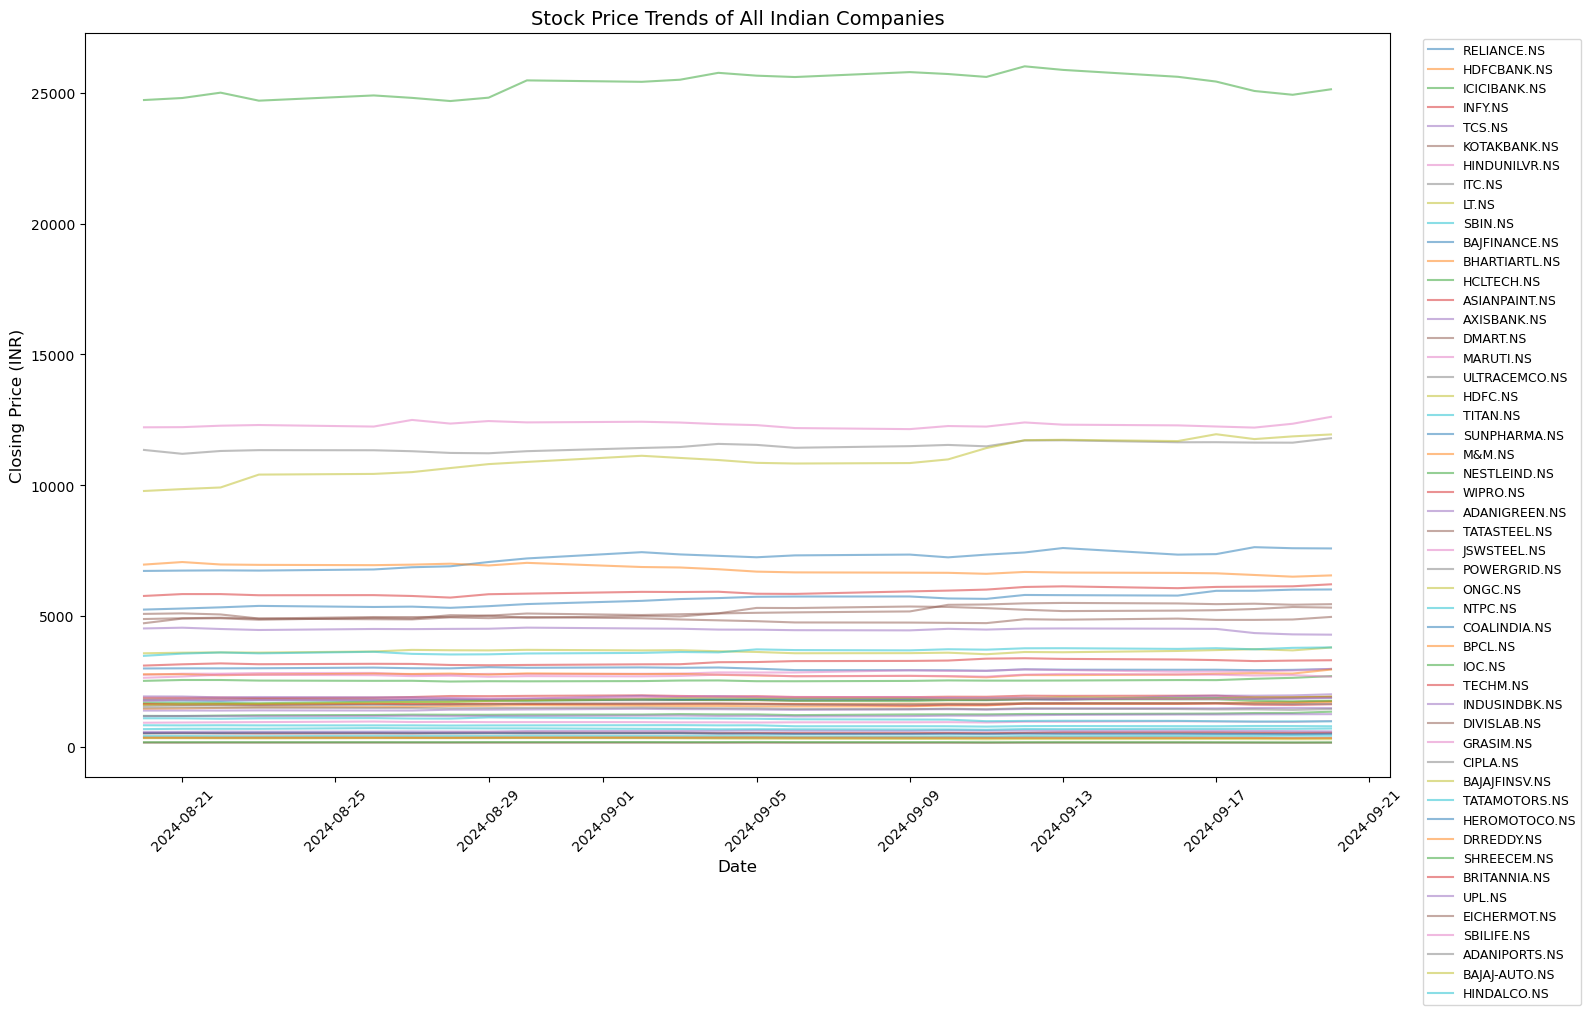

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
for i in data.columns[1:]:
    plt.plot(data['Date'],data[i],label=i,alpha=0.5)
plt.title("Stock Price Trends of All Indian Companies",fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Closing Price (INR)",fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,1),fontsize=9)
plt.tight_layout()
plt.show()

In [12]:
all_companies = data.columns[1:]
volatility_all_companies = data[all_companies].std()
volatility_all_companies.sort_values(ascending = False).head(10)


BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

In [13]:
growth_all_companies = data[all_companies].pct_change()*100
average_growth_all_companies = growth_all_companies.mean()
average_growth_all_companies.sort_values(ascending = False).head(10)


BAJAJ-AUTO.NS    0.883421
BAJAJFINSV.NS    0.791730
BHARTIARTL.NS    0.735219
DIVISLAB.NS      0.634851
HEROMOTOCO.NS    0.602192
ICICIBANK.NS     0.557742
BAJFINANCE.NS    0.536819
TITAN.NS         0.393800
HINDUNILVR.NS    0.351634
BRITANNIA.NS     0.327747
dtype: float64

In [14]:
initial_prices_all = data[all_companies].iloc[0]
final_prices_all = data[all_companies].iloc[-1]

roi_all_companies=((final_prices_all-initial_prices_all)/initial_prices_all)*100
roi_all_companies.sort_values(ascending =False).head(10)

BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120965
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

In [15]:
roi_threshold = roi_all_companies.median()
volatility_threshold = volatility_all_companies.median()
selected_companies = roi_all_companies[(roi_all_companies>roi_threshold)&(volatility_all_companies<volatility_threshold)]

selected_companies.sort_values(ascending = False)

ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

In [16]:
selected_volatility = volatility_all_companies[selected_companies.index]
inverse_volatility=1/selected_volatility
investment_ratios = inverse_volatility/inverse_volatility.sum()
investment_ratios.sort_values(ascending = False)

NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

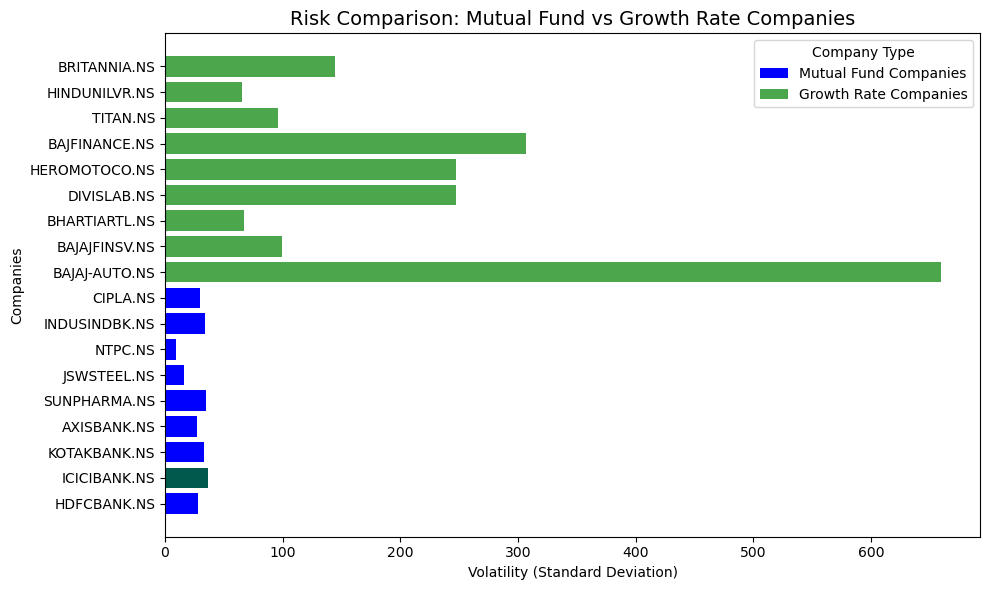

In [20]:
combined = pd.concat([risk_mutual_fund_companies, risk_growth_rate_companies], axis=1, join="outer")
combined.columns = ["Mutual Fund", "Growth Rate"]

combined = combined.fillna(0)  # Or use NaN if you want gaps

y = np.arange(len(combined))

plt.figure(figsize=(10,6))
plt.barh(y, combined["Mutual Fund"], color="blue", label="Mutual Fund Companies", alpha=1.0)
plt.barh(y, combined["Growth Rate"], color="green", label="Growth Rate Companies", alpha=0.7)

plt.title("Risk Comparison: Mutual Fund vs Growth Rate Companies", fontsize=14)
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Companies")
plt.yticks(y, combined.index)
plt.legend(title="Company Type")
plt.tight_layout()
plt.show()


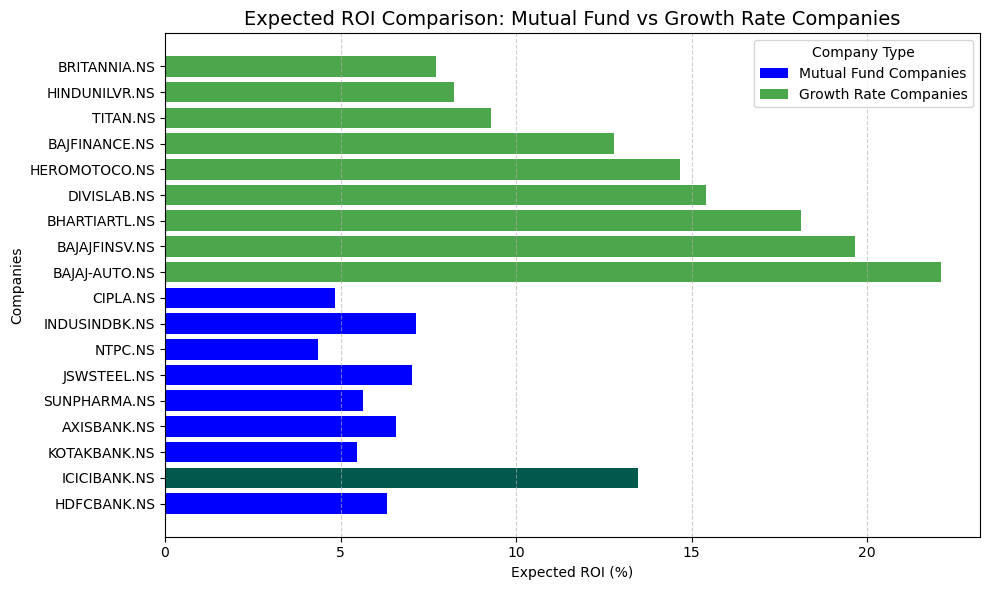

In [21]:
expected_roi_mutual_fund = roi_all_companies[selected_companies.index]
expected_roi_growth_companies = roi_all_companies[top_growth_companies.index]

plt.figure(figsize=(10,6))
plt.barh(expected_roi_mutual_fund.index,expected_roi_mutual_fund.values, color="blue", label="Mutual Fund Companies")
plt.barh(expected_roi_growth_companies.index,expected_roi_growth_companies.values, color="green", label="Growth Rate Companies", alpha=0.7)

plt.title("Expected ROI Comparison: Mutual Fund vs Growth Rate Companies", fontsize=14)
plt.xlabel("Expected ROI (%)")
plt.ylabel("Companies")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title="Company Type")
plt.tight_layout()
plt.show()

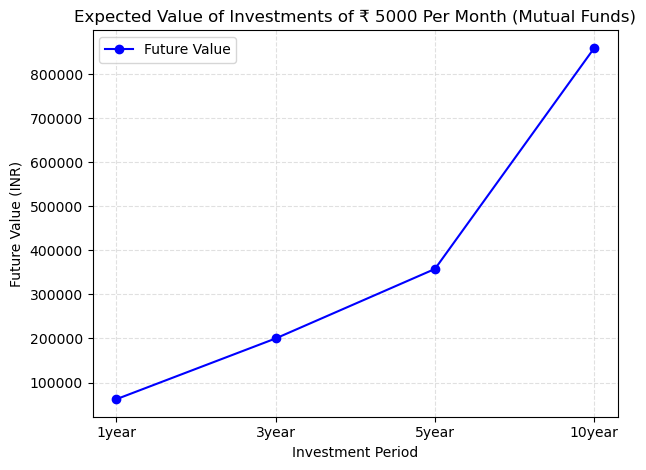

In [25]:
monthly_investment =5000
years=[1,3,5,10]
n=12

avg_roi = expected_roi_mutual_fund.mean()/100

def future_value(P,r,n,t):
    return P*(((1+r/n)**(n*t)-1)/(r/n))*(1+r/n)
future_values = [future_value(monthly_investment,avg_roi,n,t) for t in years]

plt.plot([str(year)+"year" for year in years],future_values,
        marker='o',color='blue',label='Future Value')
plt.title("Expected Value of Investments of ₹ 5000 Per Month (Mutual Funds)")
plt.xlabel("Investment Period")
plt.ylabel("Future Value (INR)")
plt.grid(True,which='both',color='lightgrey',linestyle='--',alpha =0.7)
plt.legend()
plt.tight_layout()
plt.show()